# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url + apikey snippet
main_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create list to hold city data
cities_dict_list = []

# Start counters
record_count = 1
    
# Loop through all the cities in our list
for i, city in enumerate(cities):

    #base url + apikey snippet + iterating city url
    city_url = main_url + "&q=" + city
    
    # display the record# and corresponding city
    print(f"Processing Record {record_count} | {city}")

    #tick record counter
    record_count = record_count + 1
    
    #Start API call
    try:
        #call the API at the current city's endpoint
        api_call = requests.get(city_url)
        #jsonify the retrieved data
        readings = api_call.json()

        #create variables to hold temperature, cloudiness, humidity, windspeed
        lat = readings["coord"]["lat"]
        lng = readings["coord"]["lon"]
        max_temp = readings["main"]["temp_max"]
        humidity = readings["main"]["humidity"]
        clouds = readings["clouds"]["all"]
        wind = readings["wind"]["speed"]
        country = readings["sys"]["country"]
        date = readings["dt"]

        # Append the City information into data list
        cities_dict_list.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
    #Error prevention; abort city if it fails to return data
    except:
        print("Invalid request. Skipping city")
        pass
print("Operation Complete")

Processing Record 1 | chicama
Processing Record 2 | hithadhoo
Processing Record 3 | kholodnyy
Processing Record 4 | luderitz
Processing Record 5 | cayenne
Processing Record 6 | nizhneyansk
Invalid request. Skipping city
Processing Record 7 | iqaluit
Processing Record 8 | henties bay
Processing Record 9 | palabuhanratu
Invalid request. Skipping city
Processing Record 10 | ambagarh chauki
Processing Record 11 | cape town
Processing Record 12 | bubaque
Processing Record 13 | matucana
Processing Record 14 | new norfolk
Processing Record 15 | barrow
Processing Record 16 | vila velha
Processing Record 17 | la ronge
Processing Record 18 | puerto ayora
Processing Record 19 | dunedin
Processing Record 20 | rikitea
Processing Record 21 | los alamos
Processing Record 22 | punta arenas
Processing Record 23 | lavrentiya
Processing Record 24 | zuwarah
Processing Record 25 | chandbali
Processing Record 26 | busselton
Processing Record 27 | ballina
Processing Record 28 | albany
Processing Record 29 | 

Processing Record 231 | faya
Processing Record 232 | sentyabrskiy
Invalid request. Skipping city
Processing Record 233 | rio cuarto
Processing Record 234 | tumannyy
Invalid request. Skipping city
Processing Record 235 | saint george
Processing Record 236 | kabin buri
Processing Record 237 | yenagoa
Processing Record 238 | cabedelo
Processing Record 239 | beian
Processing Record 240 | nadym
Processing Record 241 | jamestown
Processing Record 242 | bantry
Processing Record 243 | saleaula
Invalid request. Skipping city
Processing Record 244 | san martin
Processing Record 245 | nanortalik
Processing Record 246 | kashi
Processing Record 247 | yar-sale
Processing Record 248 | ellsworth
Processing Record 249 | longido
Processing Record 250 | sambava
Processing Record 251 | hendek
Processing Record 252 | kirakira
Processing Record 253 | qasigiannguit
Processing Record 254 | labutta
Invalid request. Skipping city
Processing Record 255 | bud
Processing Record 256 | kahului
Processing Record 257 

Invalid request. Skipping city
Processing Record 458 | yulin
Processing Record 459 | la cruz
Processing Record 460 | turayf
Processing Record 461 | tigil
Processing Record 462 | kulhudhuffushi
Processing Record 463 | airai
Processing Record 464 | khalkhal
Processing Record 465 | rocha
Processing Record 466 | cam pha
Invalid request. Skipping city
Processing Record 467 | avera
Processing Record 468 | dir
Processing Record 469 | ngukurr
Invalid request. Skipping city
Processing Record 470 | sao jose da coroa grande
Processing Record 471 | charlestown
Processing Record 472 | pachino
Processing Record 473 | tateyama
Processing Record 474 | noumea
Processing Record 475 | mezen
Processing Record 476 | attawapiskat
Invalid request. Skipping city
Processing Record 477 | galle
Processing Record 478 | chubbuck
Processing Record 479 | porbandar
Processing Record 480 | primorsk
Processing Record 481 | ponta delgada
Processing Record 482 | yuli
Processing Record 483 | san patricio
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dataframe
cities_df = pd.DataFrame(cities_dict_list)

#isolate relevant columns for matplotlib analysis
lats = cities_df["Lat"]
max_temps = cities_df["Max Temp"]
humidity = cities_df["Humidity"]
cloudiness = cities_df["Cloudiness"]
wind_speed = cities_df["Wind Speed"]

#generate csv
cities_df.to_csv("cities.csv", index_label="City_ID")

#verify all rows/columns are equally populated
cities_df.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
#create variables for insertion into plots
y_values = max_temps, humidity, cloudiness, wind_speed
titles = "Max Temperature (%s)", "Humidity (%s)", "Cloudiness (%s)","Wind Speed (%s)"
y_labels = "Max Temperature (F)", "Humidity (%)", "Cloudiness (%)","Wind Speed (mph)"

#### Latitude vs. Temperature Plot

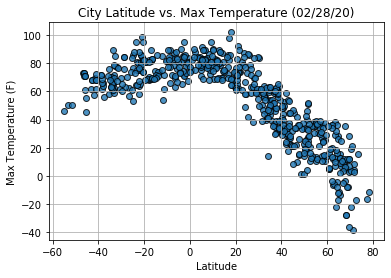

In [18]:
i = 0
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            y_values[i],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {titles[i]}" % time.strftime("%x"))
plt.ylabel(y_labels[i])
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(f"Fig{i}.png")

#### Latitude vs. Humidity Plot

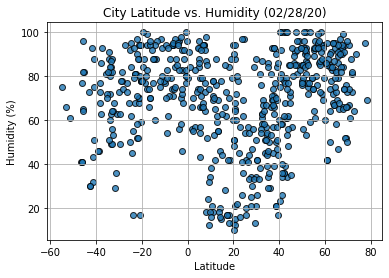

In [19]:
i = 1
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            y_values[i],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {titles[i]}" % time.strftime("%x"))
plt.ylabel(y_labels[i])
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(f"Fig{i}.png")

#### Latitude vs. Cloudiness Plot

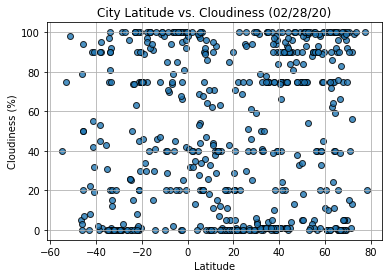

In [20]:
i = 2
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            y_values[i],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {titles[i]}" % time.strftime("%x"))
plt.ylabel(y_labels[i])
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(f"Fig{i}.png")

#### Latitude vs. Wind Speed Plot

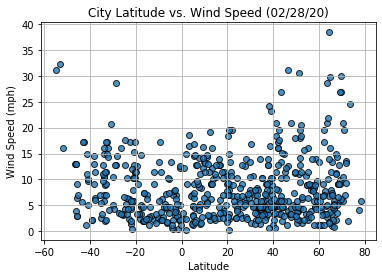

In [21]:
i = 3
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            y_values[i],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {titles[i]}" % time.strftime("%x"))
plt.ylabel(y_labels[i])
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(f"Fig{i}.png")